In [7]:
# import intake
import xarray as xr
import numpy as np
import matplotlib.pylab as plt
import matplotlib.cm as cm
import cmocean.cm as cmo
from scipy.interpolate import CloughTocher2DInterpolator, LinearNDInterpolator, NearestNDInterpolator
import gribscan
import intake
import cartopy.crs as ccrs
import cartopy.feature as cfeature

Get the data

In [24]:
# NEW way with concat files: json file was already prepared with gribscan-index and gribscan-build command line tools
datapath='/work/bm1344/AWI/nextGEMS_Cycle2_IFS_concat/tco1279-orca025/nemo_deep/varfiles_all/'
datazarr=datapath+'/json.dir/atm2d.json' # all 2D surface fields, this is the whole dataset!
data_conc = xr.open_zarr("reference::"+datazarr, consolidated=False)

In [25]:
# this is nemo deep off, no ref to compare against
datapath2='/work/bm1344/AWI/nextGEMS_Cycle2_IFS_concat/tco1279-orca025/nemo/varfiles_all/'
datazarr2=datapath2+'/json.dir/atm2d.json' # all 2D surface fields, this is the whole dataset!
data_conc2 = xr.open_zarr("reference::"+datazarr2, consolidated=False)

In [26]:
#original data:
cat = intake.open_catalog("../catalog.yaml")
run = cat.IFS["tco1279-orca025"]
#data = run.ICMU_atm2d.to_dask()
data = run.ICMGG_atm2d.to_dask()

In [27]:
data.sel(level=1)

<xarray.Dataset>
Dimensions:  (time: 17089, value: 6599680)
Coordinates:
    lat      (value) float64 dask.array<chunksize=(6599680,), meta=np.ndarray>
    level    int64 1
    lon      (value) float64 dask.array<chunksize=(6599680,), meta=np.ndarray>
  * time     (time) datetime64[ns] 2020-01-20 2020-01-20T01:00:00 ... 2022-01-01
Dimensions without coordinates: value
Data variables: (12/87)
    100si    (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    100u     (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    100v     (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    10u      (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    10v      (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    2d       (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    ...       ...
    vike     (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    vipie    (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    vipile   (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    vithe    (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    z        (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    zos      (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
Attributes:
    edition:            1
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          0
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

In [28]:
data_conc.sel(level=1) # this also has lnsp in there, not a big deal

<xarray.Dataset>
Dimensions:  (time: 17089, value: 6599680)
Coordinates:
    lat      (value) float64 dask.array<chunksize=(6599680,), meta=np.ndarray>
    level    int64 1
    lon      (value) float64 dask.array<chunksize=(6599680,), meta=np.ndarray>
  * time     (time) datetime64[ns] 2020-01-20 2020-01-20T01:00:00 ... 2022-01-01
Dimensions without coordinates: value
Data variables: (12/88)
    100si    (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    100u     (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    100v     (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    10u      (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    10v      (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    2d       (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    ...       ...
    vike     (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    vipie    (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    vipile   (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    vithe    (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    z        (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    zos      (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
Attributes:
    edition:            1
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          0
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

In [29]:
data_conc.isel(level=1,time=2)['2t'].values[::99999]

array([245.34454346, 269.81329346, 251.28594971, 254.53399658,
       253.60626221, 272.81329346, 258.68048096, 272.34454346,
       283.82110596, 265.46173096, 284.90899658, 268.86798096,
       276.34063721, 278.71563721, 276.97930908, 292.71368408,
       293.85821533, 295.81134033, 288.05938721, 295.14727783,
       299.15509033, 298.77618408, 297.27813721, 297.30548096,
       295.69415283, 299.21368408, 299.78594971, 300.11407471,
       300.01837158, 299.21954346, 299.60821533, 302.29962158,
       301.68243408, 301.33477783, 298.22930908, 300.48321533,
       297.97149658, 303.48126221, 302.27032471, 299.50469971,
       301.40899658, 301.88165283, 297.31134033, 300.87384033,
       294.10626221, 298.51837158, 299.97149658, 293.42266846,
       298.39532471, 297.61798096, 298.51055908, 297.32891846,
       294.23516846, 292.12579346, 291.37774658, 289.53985596,
       290.67266846, 286.73907471, 278.59259033, 280.40509033,
       279.86993408, 278.91680908, 276.98907471, 274.66

In [30]:
data_conc2.isel(level=2,time=2)['2t'].values[::99999]

array([245.34638977, 269.82685852, 251.36592102, 254.4811554 ,
       253.60029602, 272.80342102, 258.62568665, 272.32295227,
       283.82881165, 265.45967102, 284.87373352, 268.93623352,
       276.14131165, 278.71943665, 277.09248352, 292.70576477,
       293.85420227, 295.85420227, 288.0592804 , 295.14131165,
       299.1295929 , 298.76826477, 297.26045227, 297.29170227,
       295.69599915, 299.38349915, 299.88154602, 299.99287415,
       300.00654602, 299.21162415, 300.73310852, 302.31318665,
       301.65888977, 301.33076477, 298.2311554 , 300.47920227,
       298.0983429 , 303.37568665, 302.27998352, 299.54560852,
       302.23506165, 301.8092804 , 297.38545227, 300.9733429 ,
       294.10224915, 298.45967102, 299.96943665, 293.36982727,
       298.37568665, 297.99287415, 298.46357727, 297.21748352,
       294.23506165, 292.1061554 , 291.42060852, 289.53193665,
       290.68623352, 286.73506165, 278.59638977, 280.4030304 ,
       279.86201477, 278.9186554 , 276.9889679 , 274.66

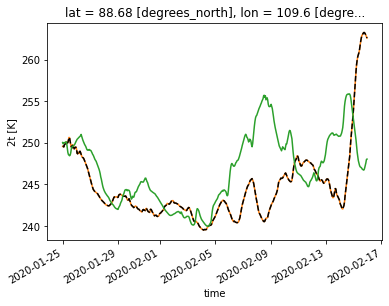

In [31]:
data_conc.sel(time=slice('2020-01-25','2020-02-15')).isel(value=1000)['2t'].plot(c='C1')
data.sel(time=slice('2020-01-25','2020-02-15')).isel(value=1000)['2t'].plot(ls='--',c='k')
data_conc2.sel(time=slice('2020-01-25','2020-02-15')).isel(value=1000)['2t'].plot(c='C2')

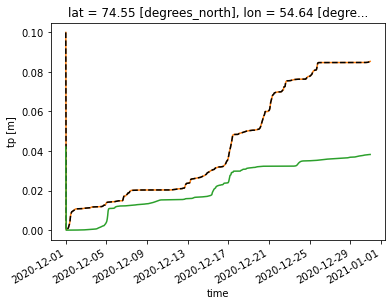

In [32]:
data_conc.sel(time=slice('2020-12-01','2020-12-30')).isel(value=100000)['tp'].plot(c='C1')
data.sel(time=slice('2020-12-01','2020-12-30')).isel(value=100000)['tp'].plot(ls='--',c='k')
data_conc2.sel(time=slice('2020-12-01','2020-12-30')).isel(value=100000)['tp'].plot(c='C2')

We check 3d data now

In [33]:
# NEW way with concat files: json file was already prepared with gribscan-index and gribscan-build command line tools
datapath='/work/bm1344/AWI/nextGEMS_Cycle2_IFS_concat/tco1279-orca025/nemo_deep/varfiles_all/'
datazarr=datapath+'/json.dir/atm3d.json' # all 2D surface fields, this is the whole dataset!
data_conc = xr.open_zarr("reference::"+datazarr, consolidated=False)

In [34]:
# nemo-deep
datapath2='/work/bm1344/AWI/nextGEMS_Cycle2_IFS_concat/tco1279-orca025/nemo/varfiles_all/'
datazarr2=datapath2+'/json.dir/atm3d.json' # all 2D surface fields, this is the whole dataset!
data_conc2 = xr.open_zarr("reference::"+datazarr2, consolidated=False)

In [35]:
#original data:
cat = intake.open_catalog("../catalog.yaml")
run = cat.IFS["tco1279-orca025"]
#data = run.ICMU_atm2d.to_dask()
data = run.ICMU_atm3d.to_dask()

Pick randomly selected points and compare

In [ ]:
data.u.isel(time=2200,level=18).values[:10000000] 

array([-12.46746826, -15.83270264, -17.65496826, ...,  -5.84832764,
        -3.74481201,  -1.23504639])

In [ ]:
data_conc.u.isel(time=2200,level=18).values[:10000000]

array([-12.46746826, -15.83270264, -17.65496826, ...,  -5.84832764,
        -3.74481201,  -1.23504639])

In [36]:
data_sample     = data.u.sel(time='2020-02-02-00:00:00',level=850.) 
dataconc_sample = data_conc.u.sel(time='2020-02-02-00:00:00',level=850.) 
dataconc2_sample = data_conc2.u.sel(time='2020-02-02-00:00:00',level=850.) 

And maps

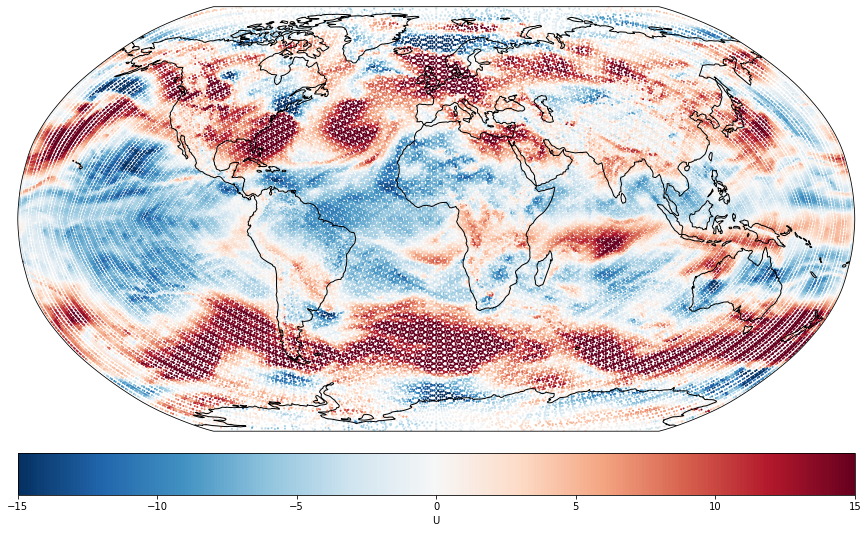

In [37]:
# sstep controls the spacing between points to plot
sstep=64

# plot using the simple scatter method:
plt.figure(figsize=(15,10))
# plot using Robinson projection.
#ax = plt.axes(projection=ccrs.PlateCarree())
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution='110m', color='k')

sc=ax.scatter(data_sample.lon[::sstep], data_sample.lat[::sstep], s=1 , c=data_sample[::sstep],cmap=cm.RdBu_r, transform=ccrs.PlateCarree(), vmin=-15,vmax=15)
# Add colorbar
cbar=plt.colorbar(sc,orientation='horizontal', pad=0.04)
cbar.set_label(r'U')
#plt.clim(-20, 29.) 

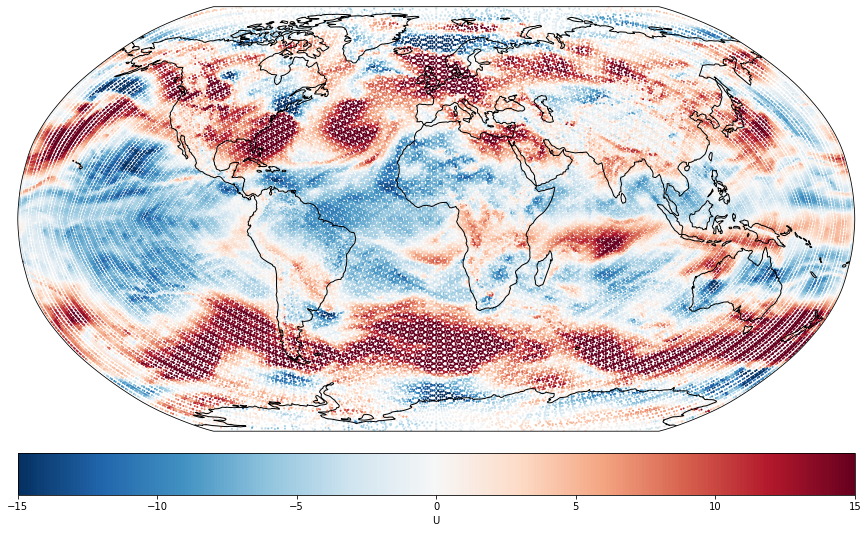

In [38]:
# plot using the simple scatter method:
plt.figure(figsize=(15,10))
# plot using Robinson projection.
#ax = plt.axes(projection=ccrs.PlateCarree())
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution='110m', color='k')

sc=ax.scatter(dataconc_sample.lon[::sstep], dataconc_sample.lat[::sstep], s=1 , c=dataconc_sample[::sstep],cmap=cm.RdBu_r, transform=ccrs.PlateCarree(), vmin=-15,vmax=15)
# Add colorbar
cbar=plt.colorbar(sc,orientation='horizontal', pad=0.04)
cbar.set_label(r'U')
#plt.clim(-20, 29.) 

And check difference between the maps

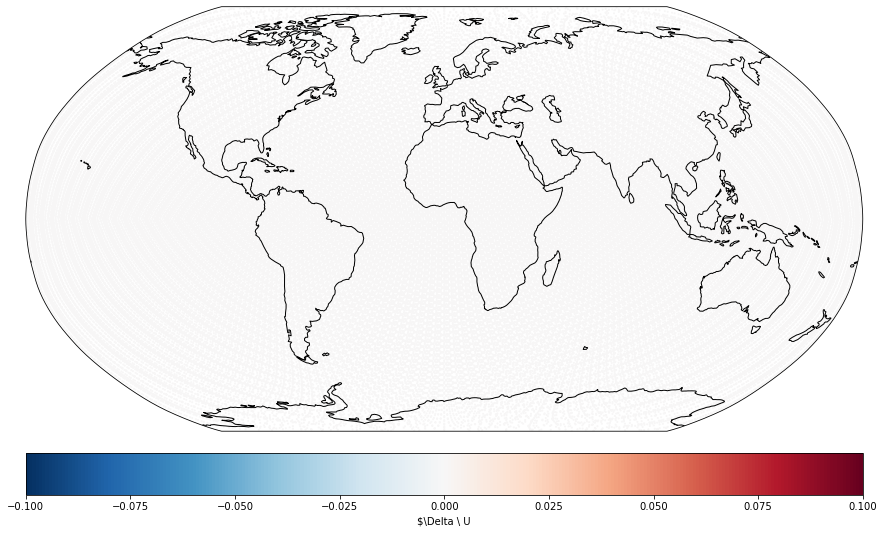

In [39]:
# sstep controls the spacing between points to plot
sstep=64

# plot using the simple scatter method:
plt.figure(figsize=(15,10))
# plot using Robinson projection.
#ax = plt.axes(projection=ccrs.PlateCarree())
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution='110m', color='k')

sc=ax.scatter(data_sample.lon[::sstep], data_sample.lat[::sstep], s=1 , c=data_sample[::sstep]-dataconc_sample[::sstep],cmap=cm.RdBu_r, transform=ccrs.PlateCarree(), vmin=-00.1,vmax=00.1)
# Add colorbar
cbar=plt.colorbar(sc,orientation='horizontal', pad=0.04)
cbar.set_label(r'$\Delta \ U')
#plt.clim(-20, 29.) 

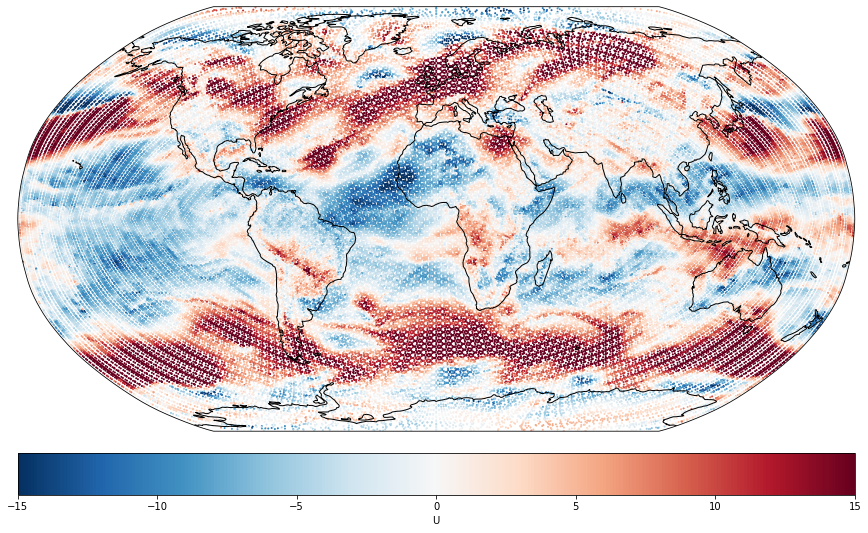

In [41]:
# and a map of nemo -no deep is, without ref to comapre against:
# plot using the simple scatter method:
plt.figure(figsize=(15,10))
# plot using Robinson projection.
#ax = plt.axes(projection=ccrs.PlateCarree())
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution='110m', color='k')

sc=ax.scatter(dataconc2_sample.lon[::sstep], dataconc2_sample.lat[::sstep], s=1 , c=dataconc2_sample[::sstep],cmap=cm.RdBu_r, transform=ccrs.PlateCarree(), vmin=-15,vmax=15)
# Add colorbar
cbar=plt.colorbar(sc,orientation='horizontal', pad=0.04)
cbar.set_label(r'U')
#plt.clim(-20, 29.) 